In [12]:
import matplotlib.pyplot as plt

In [13]:
# Spalten der Zeitreihe
d_cols = [c for c in sales.columns if 'd_' in c]
# IDs
ids = sorted(list(set(sales['id'])))

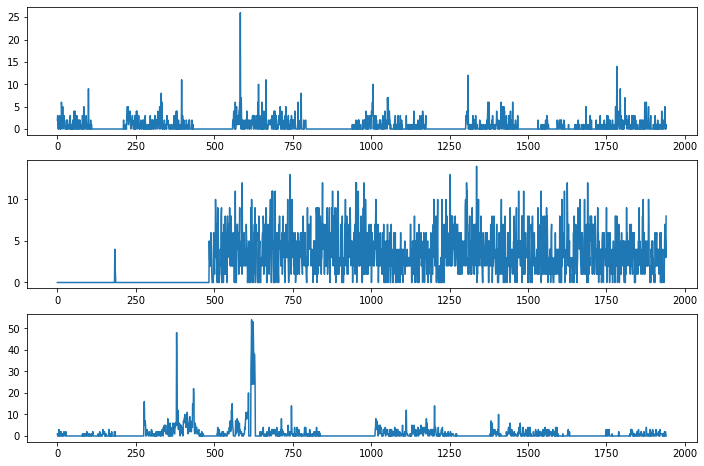

In [14]:
# Beispiel Verkaufsdaten für ID 44, 100 und 358
x1 = sales[sales['id'] == ids[44]].set_index('id')[d_cols].values[0]
x2 = sales[sales['id'] == ids[100]].set_index('id')[d_cols].values[0]
x3 = sales[sales['id'] == ids[358]].set_index('id')[d_cols].values[0]

fig, ax = plt.subplots(3,1, figsize=(12, 8))
ax[0].plot(np.arange(len(x1)), x1)
ax[1].plot(np.arange(len(x2)), x2)
ax[2].plot(np.arange(len(x3)), x3)
plt.show()

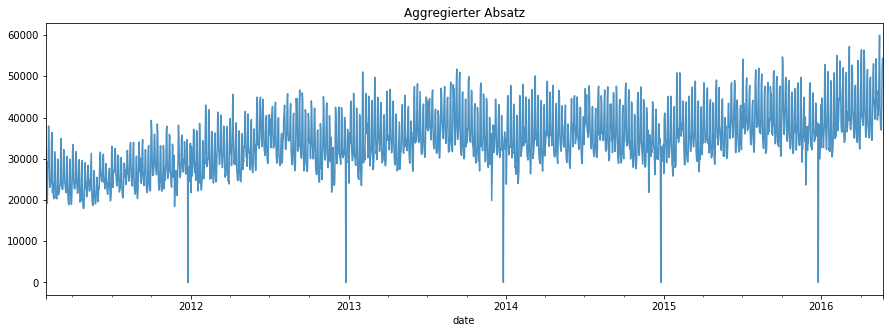

In [100]:
agg_sales = sales.set_index('id')
agg_sales = pd.DataFrame(agg_sales[d_cols].sum())
agg_sales = agg_sales.reset_index().rename(columns={'index': 'd', 0:'sum'})
agg_sales = agg_sales.merge(calendar, on='d').set_index('date')


agg_sales['sum'].plot(figsize=(15, 5),
              alpha=0.8,
              title='Aggregierter Absatz')
plt.show()

#### Verkaufszahlen nach Staaten und Kategorie

In [179]:
group_cat_date = df.groupby(['cat_id', 'year', 'month', 'state_id'])['sold'].sum().dropna()

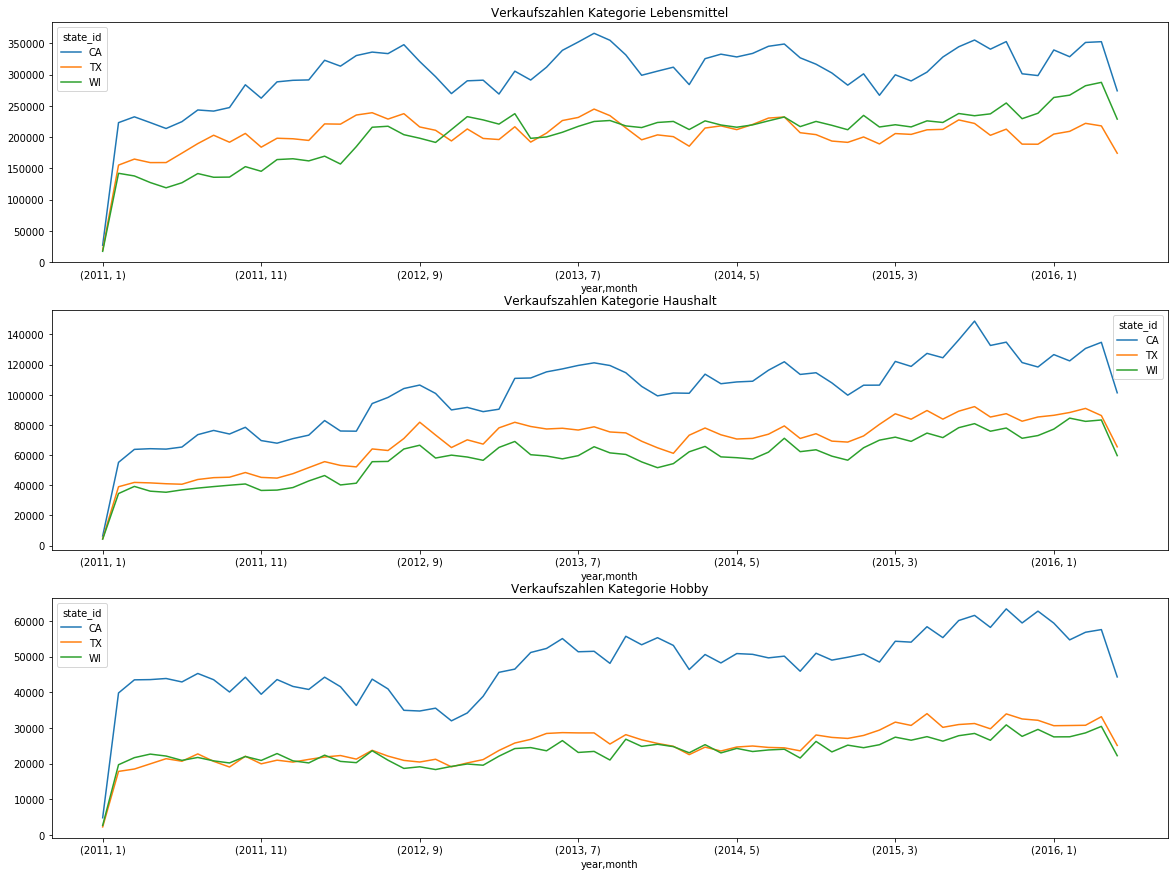

In [180]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
group_cat_date.get('FOODS').unstack().sort_index().plot(title='Verkaufszahlen Kategorie Lebensmittel',ax=axes[0])
group_cat_date.get('HOUSEHOLD').unstack().sort_index().plot(title='Verkaufszahlen Kategorie Haushalt',ax=axes[1])
group_cat_date.get('HOBBIES').unstack().sort_index().plot(title='Verkaufszahlen Kategorie Hobby', ax=axes[2])